In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv('Health_AnimalBites.csv')

In [3]:
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [5]:
df = df.sort_values('bite_date')
df = df.reset_index(drop=True)
# rows with errors in date
df.iloc[8680:8690]

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
8680,2021-04-22 00:00:00,DOG,PIT BULL,MALE,BRINDLE,NaN,NaN,40272,NaN,BODY,NaN,NaN,NaN,NaN,NaN
8681,2101-02-18 00:00:00,CAT,NaN,FEMALE,BLACK,NaN,NaN,40202,NaN,BODY,2011-02-18 00:00:00,RELEASED,NaN,NaN,NaN
8682,2201-01-21 00:00:00,CAT,NaN,MALE,GRAY,NaN,NaN,NaN,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
8683,2201-02-21 00:00:00,DOG,PIT BULL,MALE,TAN WHITE,1.0,2015-04-21 00:00:00,NaN,NaN,BODY,NaN,NaN,NaN,NaN,NaN
8684,2201-05-01 00:00:00,DOG,DACHSHUND,MALE,BROWN,1.0,2015-05-19 00:00:00,40229,NO,BODY,NaN,RELEASED,NaN,2015-05-11 00:00:00,NaN
8685,5013-07-15 00:00:00,DOG,GERM SHEPHERD,FEMALE,WHITE,1.0,2013-08-05 00:00:00,40216,NaN,BODY,NaN,NaN,NaN,NaN,NaN
8686,NaN,OTHER,NaN,NaN,NaN,NaN,NaN,40299,NO,NaN,NaN,DIED,2011-05-24 00:00:00,NaN,NEGATIVE
8687,NaN,BAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-09 00:00:00,NaN,NEGATIVE
8688,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40215,NaN,NaN,NaN,NaN,2015-02-28 00:00:00,NaN,NEGATIVE
8689,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40214,NaN,NaN,NaN,NaN,2015-03-01 00:00:00,NaN,NEGATIVE


In [6]:
date_columns = ['bite_date', 'vaccination_date', 'quarantine_date', 'head_sent_date', 'release_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df = df[(df['bite_date'] >= '1985-01-01') & (df['bite_date'] <= '2021-04-30')]


In [7]:
df['bite_month'] = df['bite_date'].dt.month
df['bite_year'] = df['bite_date'].dt.year

## Trends of Animal Bite Incidents

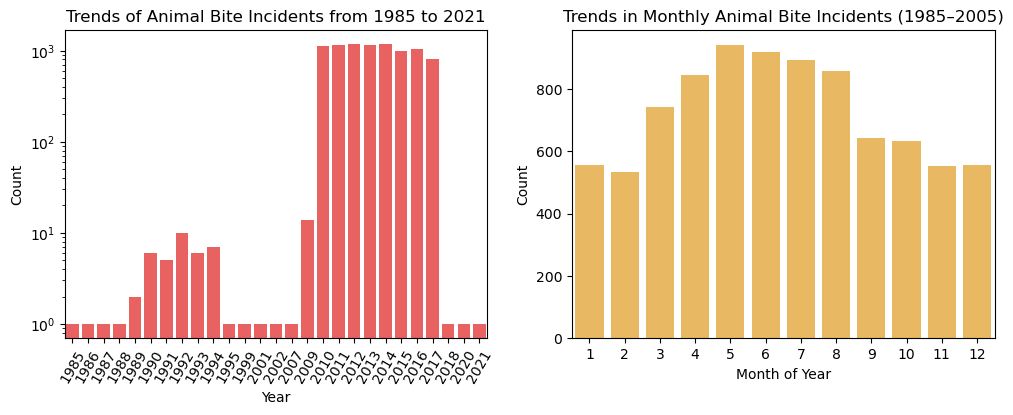

In [8]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.countplot(data=df, x='bite_year',ax = axes[0],color='red', alpha = 0.7)
axes[0].set_title('Trends of Animal Bite Incidents from 1985 to 2021')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)
axes[0].set_yscale('log')
axes[0].set_xlabel("Year")  # x-axis label
axes[0].set_ylabel("Count")

sns.countplot(data=df, x='bite_month',ax = axes[1],color= 'orange', alpha = 0.7)
axes[1].set_title('Trends in Monthly Animal Bite Incidents (1985–2005)')
axes[1].set_xlabel("Month of Year")  # x-axis label
axes[1].set_ylabel("Count")

plt.show()

There are two distinct periods of elevated reported animal bite incidents between 1985 and 2017: a moderate increase from 1989 to 1994, followed by a sharp and sustained rise from 2009 to 2017. The bite incidents were more frequent during the spring and summer months. 

## Which Animals Bite the Most?

<Axes: title={'center': 'Dogs Bite the Most: A Look at Animal Bite Statistics'}, ylabel='SpeciesIDDesc'>

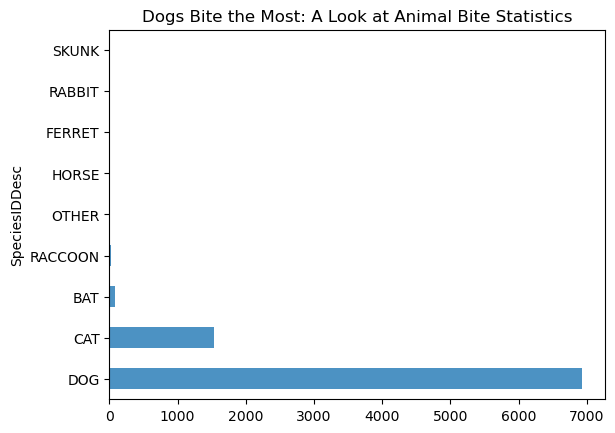

In [9]:
df["SpeciesIDDesc"].value_counts().plot(kind="barh", title="Dogs Bite the Most: A Look at Animal Bite Statistics",alpha=0.8)

## Does Vaccination History Affect Rabies Testing?

In [10]:
df = df.fillna({'vaccination_yrs':0})
df['vaccination_yrs'].unique()

array([ 1.,  0.,  3.,  2., 11.])

In [11]:
df['vaccination_yrs_class'] = df['vaccination_yrs']> 0 
df['vaccination_yrs_class'] = df['vaccination_yrs_class'].astype(int)
print(df['vaccination_yrs_class'].value_counts())

vaccination_yrs_class
0    4983
1    3696
Name: count, dtype: int64


In [12]:
df['tested'] = np.logical_or(df['ResultsIDDesc']=='POSITIVE', df['ResultsIDDesc']=='NEGATIVE')
#df[df['ResultsIDDesc']=='NEGATIVE']

In [13]:
tested = df.groupby('vaccination_yrs_class')['tested'].agg('mean')
tested.head()

vaccination_yrs_class
0    0.026289
1    0.000541
Name: tested, dtype: float64

Text(0.5, 1.0, 'Rabies Testing Rate by Vaccination History')

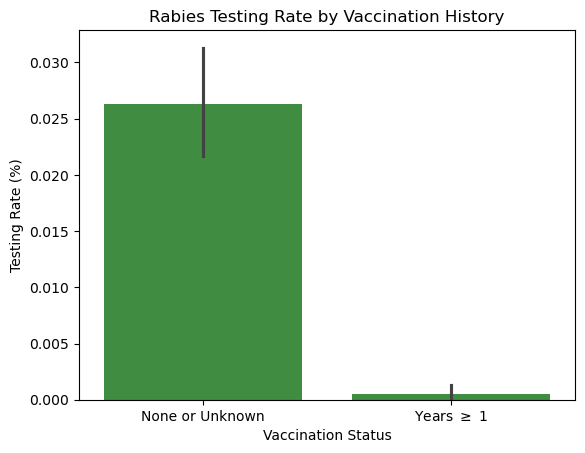

In [14]:
sns.barplot(data=df, x='vaccination_yrs_class',y='tested',color='green',alpha=0.8)
plt.xticks(ticks=[0, 1], labels=['None or Unknown', r'Years $\geq$ 1'])
plt.xlabel('Vaccination Status')
plt.ylabel('Testing Rate (%)')
plt.title('Rabies Testing Rate by Vaccination History')

There are 3,696 people with a vaccination status of $\geq$ 1 year, and 4,983 people with vaccination history $\lt$ 1 year or unknown. Individuals with unknown vaccination history or vaccination less than one year are much more likely to get tested for rabies after an animal bite compared to those with vaccination $\geq$ 1 year.

## Are Male Animals More Likely to Bite the Head Than Females?

In [15]:
genders = ['MALE','FEMALE']
subset = df[df['GenderIDDesc'] == 'MALE']
subset.groupby('WhereBittenIDDesc')['GenderIDDesc'].agg('count')

WhereBittenIDDesc
BODY       2702
HEAD        670
UNKNOWN     317
Name: GenderIDDesc, dtype: int64

In [16]:
df = df.fillna({'WhereBittenIDDesc':'UNKNOWN'})
subset['WhereBittenIDDesc'].unique()

array(['BODY', 'HEAD', 'UNKNOWN', nan], dtype=object)

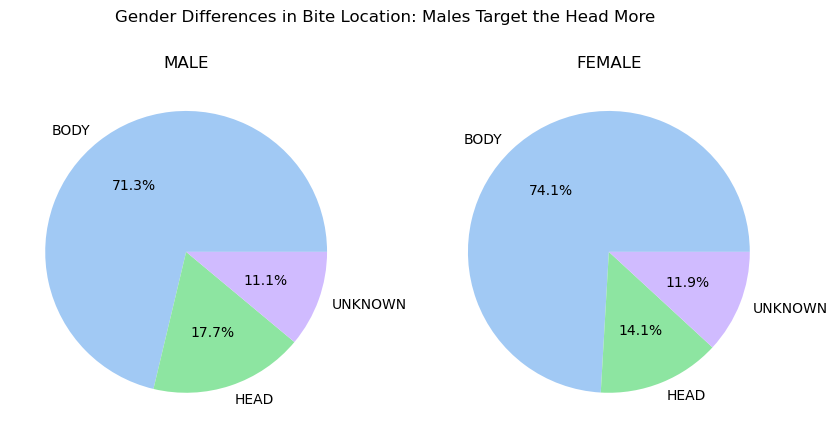

In [17]:
# Get unique genders
genders = ['MALE','FEMALE']

subset.groupby('WhereBittenIDDesc').agg('count')
# Create subplots
fig, axes = plt.subplots(1, len(genders), figsize=(10,5))

palette = sns.color_palette("pastel")[0:6:2] 

for ax, gender in zip(axes, genders):
    subset = df[df['GenderIDDesc'] == gender]
    ax.pie(subset.groupby('WhereBittenIDDesc')['GenderIDDesc'].agg('count'), labels=subset['WhereBittenIDDesc'].unique(), autopct='%1.1f%%', colors=palette)
    ax.set_title(f'{gender}')

plt.suptitle('Gender Differences in Bite Location: Males Target the Head More')
plt.show()


Compared to females, males exhibit a higher tendency to attack the head rather than other body parts.